# Self-Identified Racial/Ethnic Demographics at Three Schools, Current Employees
### by Josh Murray
### 9/23/2024

### Notes on Anonymity

... or, changes from the original project. This portfolio project was originally an interview test for a data analyst position at a school district. I have removed any identifying information from the source data, file path, and code. This code block met the "show your work" requirement. You can find the presentation in this same repository for the "manager-ready" version of the analysis. 

### Original Purpose: 

An exploration on how the self-reported race or ethnicity of current employees at Hogwarts, the SchoolOfHardKnocks, and Cool School have changed by hiring decade, and, how staff demographics compare to the student body and the potential hiring pool in My County.  

### Questions: 

1. How have staff race and ethnicity demographics at these three schools changed over time?
2. How do staff r&e demographics compare to My County (the hypothetical hiring pool)?
3. How do staff r&e demographics compare to student populations?


*Initial setup: import the pandas library, which has many methods for processing tabular data, and warnings, to hide unnecessary, distracting messages.*

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
school = pd.read_csv("C:/Users/joshc/Desktop/CPU Engineer Stuff/Project Datasets/School Project Anonymized/Information Systems Specialist Performance Task Data.csv")
school.head()

,Staff ID,Position Title,School Name,Hire Date,Resident,Race/Ethnicity
0,1,MATH,Hogwarts,10/20/1986,NO,White
1,2,MATH,Hogwarts,8/22/1988,NO,White
2,3,SOCIAL SCIENCE 6TH ONLY,HardKnocks,8/22/1988,NO,White
3,4,SCIENCE,Hogwarts,9/18/1989,NO,White
4,5,LANGUAGE ARTS 6TH ONLY,Hogwarts,8/24/1992,NO,White


*Not pictured: ran the .info(), .describe(), shape, and .head() methods to explore the data, verify that the automatically chosen data types were correct, and formulate questions.*

*Created new columns to help with later analysis: hire year, tenure, and current year. I only ended up using Hire Year, but in this stage considered analyzing race by length of employment.*

In [6]:
year_split = school['Hire Date'].str.split(pat="/", expand=True)
#print(year_split.head()) -> Verified success
school['Hire Month'] = year_split[0]
school['Hire Year'] = year_split[2]
school['Hire Year'] = school['Hire Year'].astype('Int64')
school['Current Year'] = 2024
school['Tenure'] = school['Current Year'] - school['Hire Year']
school.head()

,Staff ID,Position Title,School Name,Hire Date,Resident,Race/Ethnicity,Hire Month,Hire Year,Current Year,Tenure
0,1,MATH,Hogwarts,10/20/1986,NO,White,10,1986,2024,38
1,2,MATH,Hogwarts,8/22/1988,NO,White,8,1988,2024,36
2,3,SOCIAL SCIENCE 6TH ONLY,HardKnocks,8/22/1988,NO,White,8,1988,2024,36
3,4,SCIENCE,Hogwarts,9/18/1989,NO,White,9,1989,2024,35
4,5,LANGUAGE ARTS 6TH ONLY,Hogwarts,8/24/1992,NO,White,8,1992,2024,32


*Cleanup: Removed columns not essential to this analysis*

In [8]:
# Having Decided to focus on race/ethnicity over time, simplifying things by removing unneeded columns
drop_cols = ['Position Title', 'Resident']
school = school.drop(labels = drop_cols, axis = 1)
school.head()

,Staff ID,School Name,Hire Date,Race/Ethnicity,Hire Month,Hire Year,Current Year,Tenure
0,1,Hogwarts,10/20/1986,White,10,1986,2024,38
1,2,Hogwarts,8/22/1988,White,8,1988,2024,36
2,3,HardKnocks,8/22/1988,White,8,1988,2024,36
3,4,Hogwarts,9/18/1989,White,9,1989,2024,35
4,5,Hogwarts,8/24/1992,White,8,1992,2024,32


---

*An initial view of the trend we want to unpack: R/E by hire year.*

In [11]:
# Now begins exploring trends: 
eth_by_year = school.groupby(['Hire Year', 'Race/Ethnicity']).agg({'Staff ID':'count'})
eth_by_year

Staff ID
Hire Year Race/Ethnicity          
1986      White                  1
1988      White                  2
1989      White                  1
1992      White                  2
1993      White                  3
1994      White                  1
1996      White                  1
1997      Hispanic               1
          White                  1
1998      Black                  1
          White                  2
1999      White                  2
2000      Hispanic               1
          White                  4
2001      Multi-Racial           1
          White                  3
2003      White                  2
2004      White                  1
2005      Black                  1
          Hispanic               1
          Multi-Racial           1
          White                  2
2006      White                  3
2007      White                  3
2008      White                  2
2009      Black                  1
          White                  1
2010      Hispanic               1
2011      Hispanic               2
2012      Black                  1
          White                  6
2013      Multi-Racial           1
          White                  6
2014      Black                  1
          White                  6
2015      Hispanic               1
          White                 12
2016      Hispanic               1
          White                  6
2017      Multi-Racial           1
          White                 12
2018      Black                  1
          White                  7
2019      Hispanic               1
          Multi-Racial           2
          White                 16
2020      White                 14

*Tracking trends year-by-year would be too granular, decided to group by decade for easier visualization*

In [13]:
# This also needs brackets
# Quick function for grouping hiring by decade: 

def decade_grouper(year): 
    if year >= 2020: 
        return '2020s'
    elif year >=2010 and year <= 2019: 
        return '2010s'
    elif year >= 2000 and year <= 2009:
        return '2000s'
    elif year >= 1990 and year <= 1999: 
        return '1990s'
    elif year >= 1980 and year <= 1989: 
        return '1980s'
    else: 
        return 'unknown'

test_lamb_var = lambda x: decade_grouper(x)

school['Hire Decade'] = school['Hire Year'].apply(test_lamb_var)

print(school['Hire Decade'].head())

0    1980s
1    1980s
2    1980s
3    1980s
4    1990s
Name: Hire Decade, dtype: object


*Similar to before, now that the decade column exists, counting R/E by decade:*

In [15]:
eth_by_decade = school.groupby(['Hire Decade', 'Race/Ethnicity']).agg({'Staff ID':'count'})

In [16]:
eth_by_decade

Staff ID
Hire Decade Race/Ethnicity          
1980s       White                  4
1990s       Black                  1
            Hispanic               1
            White                 12
2000s       Black                  2
            Hispanic               2
            Multi-Racial           2
            White                 21
2010s       Black                  3
            Hispanic               6
            Multi-Racial           4
            White                 71
2020s       White                 14

*Decided to get the % of each decade. Gathering the total to support that calculation:*

In [18]:
staff_by_decade = school.groupby('Hire Decade').agg({'Staff ID':'count'})
staff_by_decade

,Staff ID
Hire Decade,
1980s,4
1990s,14
2000s,27
2010s,84
2020s,14


*This is a technical step to make chart creation and grouping easier down the road. Hiring Decade and Race/Ethnicity are technical the "index," not a column. Pulling out their data as actual columns:*

In [20]:
#Doing analysis on multi-indexes is difficult, because they are not "Real" columns, so I am moving them up and out to be actual columns
eth_by_decade['Decade'] = 'placeholder'
eth_by_decade['Race_Eth'] = 'placeholder'
for x in range(len(eth_by_decade)):
    eth_by_decade['Decade'][x] = eth_by_decade.index[x][0]
    eth_by_decade['Race_Eth'][x] = eth_by_decade.index[x][1]
print(eth_by_decade)

                            Staff ID Decade      Race_Eth
Hire Decade Race/Ethnicity                               
1980s       White                  4  1980s         White
1990s       Black                  1  1990s         Black
            Hispanic               1  1990s      Hispanic
            White                 12  1990s         White
2000s       Black                  2  2000s         Black
            Hispanic               2  2000s      Hispanic
            Multi-Racial           2  2000s  Multi-Racial
            White                 21  2000s         White
2010s       Black                  3  2010s         Black
            Hispanic               6  2010s      Hispanic
            Multi-Racial           4  2010s  Multi-Racial
            White                 71  2010s         White
2020s       White                 14  2020s         White


*Merging our totals-by-decade and our values broken out by R/E by decade into one table:*

In [22]:
# merge to get decade totals on the same table as decade+race breakdown
eth_by_decade_merged = pd.merge(
    left = eth_by_decade,
    right = staff_by_decade,
    left_on = 'Decade',
    right_on = staff_by_decade.index,
    how = 'left'
)

In [23]:
# Fix generic names from the merge
rename_mapper = {
    'Staff ID_x':'dec_eth_total_hires',
    'Staff ID_y':'dec_total_hires'
}

eth_by_decade_merged = eth_by_decade_merged.rename(mapper = rename_mapper, axis = 1)

eth_by_decade_merged

,dec_eth_total_hires,Decade,Race_Eth,dec_total_hires
0,4,1980s,White,4
1,1,1990s,Black,14
2,1,1990s,Hispanic,14
3,12,1990s,White,14
4,2,2000s,Black,27
5,2,2000s,Hispanic,27
6,2,2000s,Multi-Racial,27
7,21,2000s,White,27
8,3,2010s,Black,84
9,6,2010s,Hispanic,84


*Calculating R/E % within each decade on the newly merged table:*

In [25]:
# now for the actual goal: %
eth_by_decade_merged['dec_eth_pct'] = round((eth_by_decade_merged['dec_eth_total_hires'] / eth_by_decade_merged['dec_total_hires']) *100, 2)
#Adding this column will help with visualization later:
eth_by_decade_merged['Dec_Eth'] = eth_by_decade_merged['Decade'].str.cat(eth_by_decade_merged['Race_Eth'], sep=" ")
eth_by_decade_merged

,dec_eth_total_hires,Decade,Race_Eth,dec_total_hires,dec_eth_pct,Dec_Eth
0,4,1980s,White,4,100.00,1980s White
1,1,1990s,Black,14,7.14,1990s Black
2,1,1990s,Hispanic,14,7.14,1990s Hispanic
3,12,1990s,White,14,85.71,1990s White
4,2,2000s,Black,27,7.41,2000s Black
5,2,2000s,Hispanic,27,7.41,2000s Hispanic
6,2,2000s,Multi-Racial,27,7.41,2000s Multi-Racial
7,21,2000s,White,27,77.78,2000s White
8,3,2010s,Black,84,3.57,2010s Black
9,6,2010s,Hispanic,84,7.14,2010s Hispanic


---

*This block builds the variables necessary to create line graphs:*

In [28]:
# Checking data and preparing for visualization:
# For bar graphs:
x_labels = list(eth_by_decade_merged['Dec_Eth'])
y_labels_pct = list(eth_by_decade_merged['dec_eth_pct'])
y_labels_raw = list(eth_by_decade_merged['dec_eth_total_hires'])

# For line graphs: 
wht_filter = eth_by_decade_merged['Race_Eth'] == 'White'
x_labels_wht = list(eth_by_decade_merged[wht_filter]['Dec_Eth'])
y_labels_wht = list(eth_by_decade_merged[wht_filter]['dec_eth_pct'])
y_labels_wht_raw = list(eth_by_decade_merged[wht_filter]['dec_eth_total_hires'])

blk_filter = eth_by_decade_merged['Race_Eth'] == 'Black'
x_labels_blk = list(eth_by_decade_merged[blk_filter]['Dec_Eth'])
y_labels_blk = list(eth_by_decade_merged[blk_filter]['dec_eth_pct'])
y_labels_blk_raw = list(eth_by_decade_merged[blk_filter]['dec_eth_total_hires'])

hsp_filter = eth_by_decade_merged['Race_Eth'] == 'Hispanic'
x_labels_hsp = list(eth_by_decade_merged[hsp_filter]['Dec_Eth'])
y_labels_hsp = list(eth_by_decade_merged[hsp_filter]['dec_eth_pct'])
y_labels_hsp_raw = list(eth_by_decade_merged[hsp_filter]['dec_eth_total_hires'])

mtr_filter = eth_by_decade_merged['Race_Eth'] == 'Multi-Racial'
x_labels_mtr = list(eth_by_decade_merged[mtr_filter]['Dec_Eth'])
y_labels_mtr = list(eth_by_decade_merged[mtr_filter]['dec_eth_pct'])
y_labels_mtr_raw = list(eth_by_decade_merged[mtr_filter]['dec_eth_total_hires'])

x_labels_all_dec = list(eth_by_decade_merged['Decade'].unique())

# Having reviewed initial output, Need to add some elements to certain line lists if we want the number of records to line up for charts.
# ['1980s', '1990s', '2000s', '2010s', '2020s']
# Black and hispanic have "0" for the 80s and 2020s
y_labels_blk.insert(0, 0)
y_labels_blk_raw.insert(0, 0)
y_labels_blk.append(0)
y_labels_blk_raw.append(0)
y_labels_hsp.insert(0, 0)
y_labels_hsp_raw.insert(0, 0)
y_labels_hsp.append(0)
y_labels_hsp_raw.append(0)
# Multiracial is missing the 80s, 90s, and 2020s
for x in range(2): y_labels_mtr.insert(0,0)
for x in range(2): y_labels_mtr_raw.insert(0,0)
y_labels_mtr.append(0)
y_labels_mtr_raw.append(0)

#Check results: 
'''
#bar:
print(len(x_labels), x_labels, "\n")
print(len(y_labels_pct), y_labels_pct, "\n")
print(len(y_labels_raw), y_labels_raw, "\n")

#white line graphs
print(len(y_labels_wht), y_labels_wht, "\n")
print(len(y_labels_wht_raw), y_labels_wht_raw, "\n")
print(len(x_labels_wht), x_labels_wht, "\n")

#black line graphs
print(len(y_labels_blk), y_labels_blk, "\n")
print(len(y_labels_blk_raw), y_labels_blk_raw, "\n")
print(len(x_labels_blk), x_labels_blk, "\n")

#hispanic line graphs
print(len(y_labels_hsp), y_labels_hsp, "\n")
print(len(y_labels_hsp_raw), y_labels_hsp_raw, "\n")
print(len(x_labels_hsp), x_labels_hsp, "\n")

# multi-racial line graphs
print(len(y_labels_mtr), y_labels_mtr, "\n")
print(len(y_labels_mtr_raw), y_labels_mtr_raw, "\n")
print(len(x_labels_mtr), x_labels_mtr, "\n")


print(len(x_labels_all_dec), x_labels_all_dec)
'''

'\n#bar:\nprint(len(x_labels), x_labels, "\n")\nprint(len(y_labels_pct), y_labels_pct, "\n")\nprint(len(y_labels_raw), y_labels_raw, "\n")\n\n#white line graphs\nprint(len(y_labels_wht), y_labels_wht, "\n")\nprint(len(y_labels_wht_raw), y_labels_wht_raw, "\n")\nprint(len(x_labels_wht), x_labels_wht, "\n")\n\n#black line graphs\nprint(len(y_labels_blk), y_labels_blk, "\n")\nprint(len(y_labels_blk_raw), y_labels_blk_raw, "\n")\nprint(len(x_labels_blk), x_labels_blk, "\n")\n\n#hispanic line graphs\nprint(len(y_labels_hsp), y_labels_hsp, "\n")\nprint(len(y_labels_hsp_raw), y_labels_hsp_raw, "\n")\nprint(len(x_labels_hsp), x_labels_hsp, "\n")\n\n# multi-racial line graphs\nprint(len(y_labels_mtr), y_labels_mtr, "\n")\nprint(len(y_labels_mtr_raw), y_labels_mtr_raw, "\n")\nprint(len(x_labels_mtr), x_labels_mtr, "\n")\n\n\nprint(len(x_labels_all_dec), x_labels_all_dec)\n'

*The next two blocks import the matplotlib library, which contains resources for creating charts, and configure chart image sizes:*

In [30]:
from matplotlib import pyplot as plt

In [31]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 75

*Creating Line Graphs:*

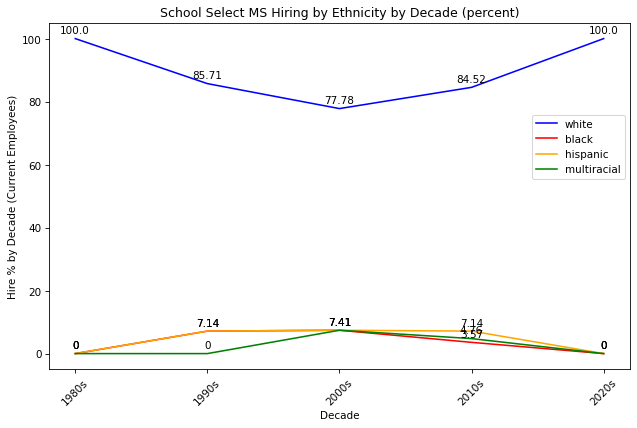


~~~



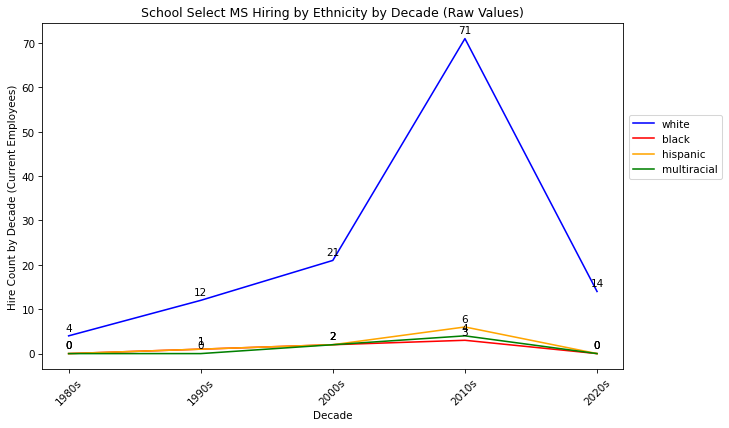

<Figure size 750x450 with 0 Axes>

In [33]:
import numpy as np
import matplotlib.ticker as t
# line charts to show change over time
#Percent: 
plt.plot(x_labels_all_dec, y_labels_wht, color="blue")
plt.plot(x_labels_all_dec, y_labels_blk, color="red")
plt.plot(x_labels_all_dec, y_labels_hsp, color="orange")
plt.plot(x_labels_all_dec, y_labels_mtr, color="green")
plt.title("School Select MS Hiring by Ethnicity by Decade (percent)")
plt.xlabel("Decade")
plt.ylabel("Hire % by Decade (Current Employees)")
plt.legend(labels = ['white','black','hispanic','multiracial'], bbox_to_anchor=(1, 0.75))
plt.tick_params(axis="x", labelrotation=45)

y_list_2 = [y_labels_wht, y_labels_blk, y_labels_hsp, y_labels_mtr]

for list in y_list_2: 
    #ytext = 1
    for x, y in zip(x_labels_all_dec, list):
        label="{}".format(y)
        plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5),ha="center")
        #ytext += 10

plt.show()
plt.clf()

print("\n~~~\n")

#Raw Totals: 
plt.plot(x_labels_all_dec, y_labels_wht_raw, color="blue")
plt.plot(x_labels_all_dec, y_labels_blk_raw, color="red")
plt.plot(x_labels_all_dec, y_labels_hsp_raw, color="orange") 
plt.plot(x_labels_all_dec, y_labels_mtr_raw, color="green")
plt.title("School Select MS Hiring by Ethnicity by Decade (Raw Values)")
plt.xlabel("Decade")
plt.ylabel("Hire Count by Decade (Current Employees)")
plt.legend(labels = ['white','black','hispanic','multiracial'], bbox_to_anchor=(1, 0.75))
plt.tick_params(axis="x", labelrotation=45)
'''ticklist = list(range(81))
labellist = [x for x in range(80) if x%10==0]
plt.yticks(ticks=ticklist, labels= labellist)'''

#Adding labels to data points
y_list = [y_labels_wht_raw, y_labels_blk_raw, y_labels_hsp_raw, y_labels_mtr_raw]

for list in y_list: 
    #ytext = 1
    for x, y in zip(x_labels_all_dec, list):
        label="{}".format(y)
        plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5),ha="center")
        #ytext += 10

plt.show()
plt.clf()



---

*Creating Pie Chart set 1 of 3: R/E hiring percent for our three middle schools broken down by decade, for still-employed staff.* 

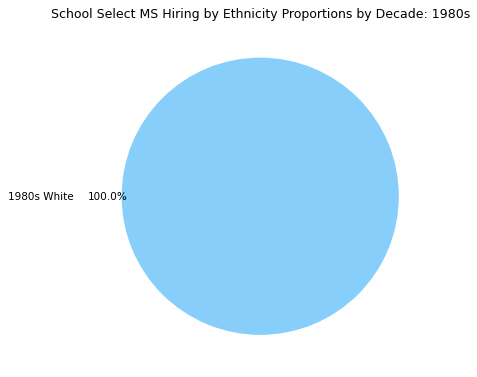


~~~



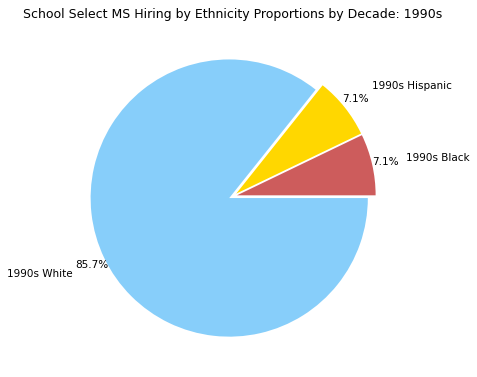


~~~



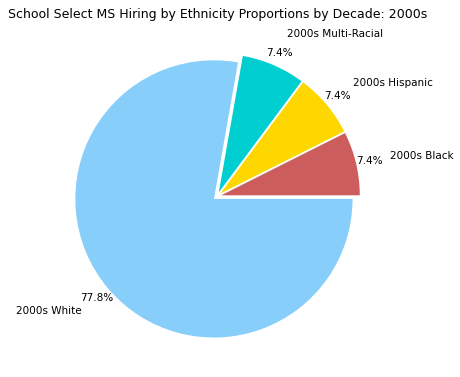


~~~



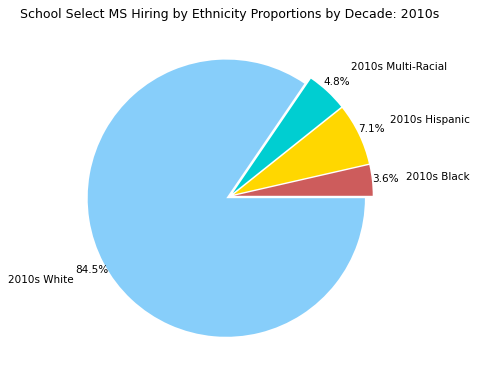


~~~



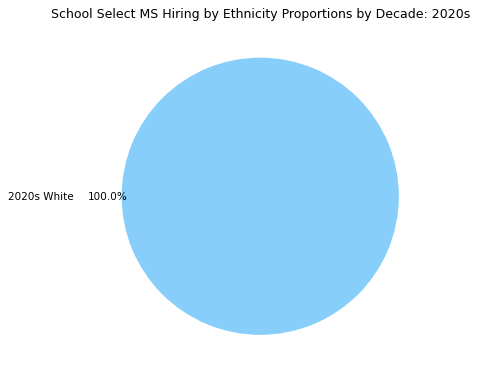

<Figure size 750x450 with 0 Axes>

In [36]:
# Now that I have worked through it, this could be a function... but with only 5 to go through, it was just as time-efficient to copy and paste.  
# filters by decades: 
filter_80s = eth_by_decade_merged['Decade'] == '1980s'
filter_90s = eth_by_decade_merged['Decade'] == '1990s'
filter_00s = eth_by_decade_merged['Decade'] == '2000s'
filter_10s = eth_by_decade_merged['Decade'] == '2010s'
filter_20s = eth_by_decade_merged['Decade'] == '2020s'

# pie chart labels by decades: 
labels_80s = eth_by_decade_merged[filter_80s]['Dec_Eth']
label_list_80s = []
for x in labels_80s: label_list_80s.append(x)
labels_90s = eth_by_decade_merged[filter_90s]['Dec_Eth']
label_list_90s = []
for x in labels_90s: label_list_90s.append(x)
labels_00s = eth_by_decade_merged[filter_00s]['Dec_Eth']
label_list_00s = []
for x in labels_00s: label_list_00s.append(x)
labels_10s = eth_by_decade_merged[filter_10s]['Dec_Eth']
label_list_10s = []
for x in labels_10s: label_list_10s.append(x)
labels_20s = eth_by_decade_merged[filter_20s]['Dec_Eth']
label_list_20s = []
for x in labels_20s: label_list_20s.append(x)

# pie chart slice sizes by decades: 
slices_80s = eth_by_decade_merged[filter_80s]['dec_eth_total_hires']
slice_list_80s = []
for x in slices_80s: slice_list_80s.append(x)
slices_90s = eth_by_decade_merged[filter_90s]['dec_eth_total_hires']
slice_list_90s = []
for x in slices_90s: slice_list_90s.append(x)
slices_00s = eth_by_decade_merged[filter_00s]['dec_eth_total_hires']
slice_list_00s = []
for x in slices_00s: slice_list_00s.append(x)
slices_10s = eth_by_decade_merged[filter_10s]['dec_eth_total_hires']
slice_list_10s = []
for x in slices_10s: slice_list_10s.append(x)
slices_20s = eth_by_decade_merged[filter_20s]['dec_eth_total_hires']
slice_list_20s = []
for x in slices_20s: slice_list_20s.append(x)

#Show Results: 

#plt.pie(slices_80s, labels_80s)
#plt.show()
explode3 = [.03,.03,.03]
explode4 = [.03,.03,.03,.03]

plt.title("School Select MS Hiring by Ethnicity Proportions by Decade: 1980s")
colors80s = ['lightskyblue']
plt.pie(slice_list_80s, labels = label_list_80s, colors = colors80s, autopct='%1.1f%%', pctdistance = 1.1, labeldistance = 1.35)
plt.show()
plt.clf()
print("\n~~~\n")
plt.title("School Select MS Hiring by Ethnicity Proportions by Decade: 1990s")
colors90s = ['indianred','gold','lightskyblue']
plt.pie(slice_list_90s, labels = label_list_90s, colors=colors90s, explode=explode3,  autopct='%1.1f%%', pctdistance = 1.1, labeldistance = 1.25)
plt.show()
plt.clf()
print("\n~~~\n")
plt.title("School Select MS Hiring by Ethnicity Proportions by Decade: 2000s")
colors00s = ['indianred','gold','darkturquoise','lightskyblue']
plt.pie(slice_list_00s, labels = label_list_00s, colors = colors00s, explode=explode4,  autopct='%1.1f%%', pctdistance = 1.1, labeldistance = 1.25)
plt.show()
plt.clf()
print("\n~~~\n")
plt.title("School Select MS Hiring by Ethnicity Proportions by Decade: 2010s")
plt.pie(slice_list_10s, labels = label_list_10s, colors = colors00s, explode=explode4,  autopct='%1.1f%%', pctdistance = 1.1, labeldistance = 1.25)
plt.show()
plt.clf()
print("\n~~~\n")
plt.title("School Select MS Hiring by Ethnicity Proportions by Decade: 2020s")
plt.pie(slice_list_20s, labels = label_list_20s, colors=colors80s,  autopct='%1.1f%%', pctdistance = 1.1, labeldistance = 1.35)
plt.show()
plt.clf()

In [37]:
# I did not want to mess up my results above by sorting the table, but here it is: 
eth_by_decade_merged_sorted = eth_by_decade_merged.sort_values(by='Decade', ascending=True).reset_index()
eth_by_decade_merged_sorted

,index,dec_eth_total_hires,Decade,Race_Eth,dec_total_hires,dec_eth_pct,Dec_Eth
0,0,4,1980s,White,4,100.00,1980s White
1,1,1,1990s,Black,14,7.14,1990s Black
2,2,1,1990s,Hispanic,14,7.14,1990s Hispanic
3,3,12,1990s,White,14,85.71,1990s White
4,4,2,2000s,Black,27,7.41,2000s Black
5,5,2,2000s,Hispanic,27,7.41,2000s Hispanic
6,6,2,2000s,Multi-Racial,27,7.41,2000s Multi-Racial
7,7,21,2000s,White,27,77.78,2000s White
8,8,3,2010s,Black,84,3.57,2010s Black
9,9,6,2010s,Hispanic,84,7.14,2010s Hispanic


---

*Importing Data for question 2: How do the demograhics of staff at the studied school compare to those of My County over the same time period?*

In [40]:
countydemo = pd.read_csv("C:/Users/joshc/Desktop/CPU Engineer Stuff/Project Datasets/School Project Anonymized/My_County_Demographics.csv")
countydemo.head()

,year,Total_Pop,White,white_pct,Black,black_pct,Hispanic,hispanic_pct,AAPI,aapi_pct,Multiracial,multi_pct,Indigenous,ind_pct
0,1980,303813,286285,0.9423,13750,0.0453,0,0.0000,0,0.0000,0,0.0000,0,0.0000
1,1990,328531,300672,0.9152,14736,0.0449,6275,0.0191,6000,0.0183,0,0.0000,848,0.0026
2,2000,375627,325478,0.8665,18187,0.0484,16936,0.0451,10330,0.0275,3824,0.0102,872,0.0023
3,2010,432360,349205,0.8077,25940,0.0600,32903,0.0761,15653,0.0362,7763,0.0180,896,0.0021
4,2020,492997,376577,0.7639,35135,0.0713,43589,0.0884,25492,0.0517,11507,0.0233,697,0.0014


*Selecting just the columns we need to create pie charts:*

In [42]:
county_pie = countydemo[['year','White','Black','Hispanic','AAPI','Multiracial','Indigenous']]
county_pie

,year,White,Black,Hispanic,AAPI,Multiracial,Indigenous
0,1980,286285,13750,0,0,0,0
1,1990,300672,14736,6275,6000,0,848
2,2000,325478,18187,16936,10330,3824,872
3,2010,349205,25940,32903,15653,7763,896
4,2020,376577,35135,43589,25492,11507,697


*Creating the variables necessary to populate pie charts:*

In [44]:
# Pie chart will take care of portions
county_labels = []
for col in county_pie.columns: county_labels.append(col)
county_labels.remove('year')
# pie chart values by year
#First, filters:
county_filter_80 = county_pie['year'] == 1980
county_filter_90 = county_pie['year'] == 1990
county_filter_00 = county_pie['year'] == 2000
county_filter_10 = county_pie['year'] == 2010
county_filter_20 = county_pie['year'] == 2020

# Next, slice content for each decade: 
labels_80s = ['White','Black'] # not all categories polled for until 2000
county_slice_80s = county_pie[county_filter_80]
county_slice_80s = county_slice_80s.drop(['year'], axis=1)
list_80_values = []
for x in county_slice_80s.iloc[0]: 
    if x > 0: 
        list_80_values.append(x)


labels_90s = ['White','Black','Hispanic','AAPI','Indigenous']
county_slice_90s =  county_pie[county_filter_90]
county_slice_90s = county_slice_90s.drop(['year'], axis=1)
list_90_values = []
for x in county_slice_90s.iloc[0]: 
    if x > 0: 
        list_90_values.append(x)

county_slice_00s =  county_pie[county_filter_00]
county_slice_00s = county_slice_00s.drop(['year'], axis=1)
list_00_values = []
for x in county_slice_00s.iloc[0]: list_00_values.append(x)

county_slice_10s = county_pie[county_filter_10]
county_slice_10s = county_slice_10s.drop(['year'], axis=1)
list_10_values = []
for x in county_slice_10s.iloc[0]: list_10_values.append(x)

county_slice_20s = county_pie[county_filter_20]
county_slice_20s = county_slice_20s.drop(['year'], axis=1)
list_20_values = []
for x in county_slice_20s.iloc[0]: list_20_values.append(x)


*Pie Chart set 2 of 3: R/E demographics of County by decade:*

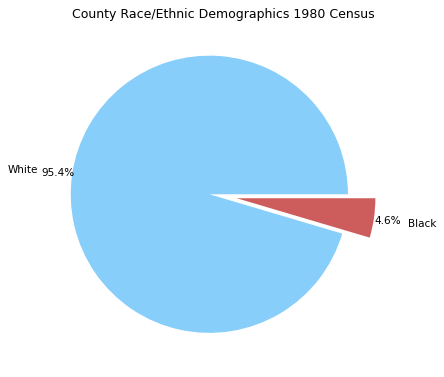


~~~



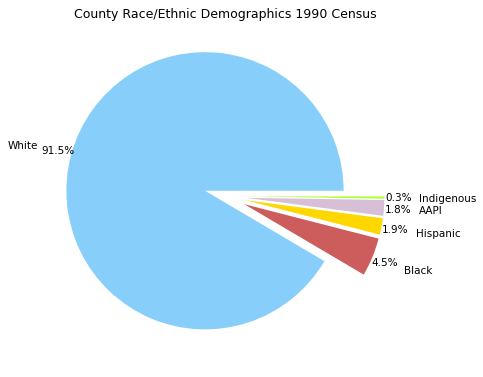


~~~



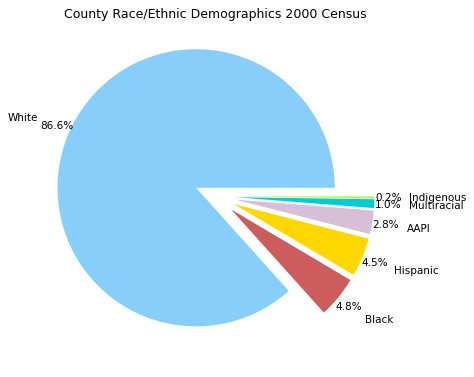


~~~



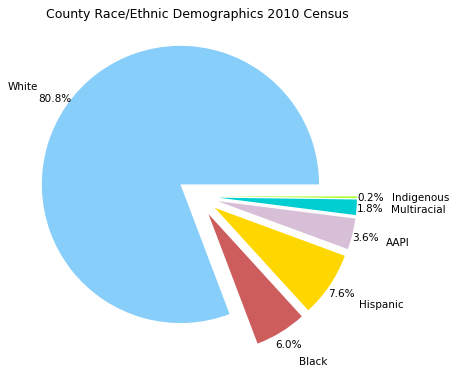


~~~



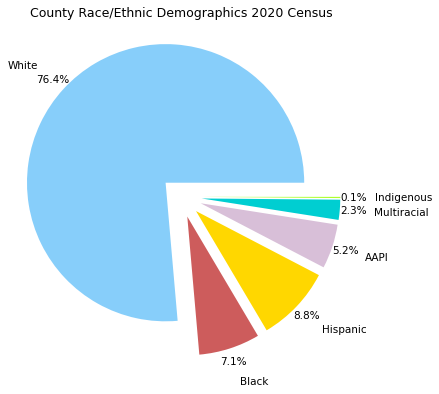


~~~



<Figure size 750x450 with 0 Axes>

In [46]:
# Show historical county pie chart demo results: 
explode2 = [.1,.1]
explode5 = [.15,.15,.15,.15,.15]
explode6 = [.15,.15,.15,.15,.15,.15]

plt.title("County Race/Ethnic Demographics 1980 Census")
countycolor80 = ['lightskyblue','indianred']
plt.pie(list_80_values, labels = labels_80s, colors=countycolor80, explode = explode2, autopct='%1.1f%%', pctdistance = 1.1, labeldistance = 1.25)
plt.show()
plt.clf()
print("\n~~~\n")
plt.title("County Race/Ethnic Demographics 1990 Census")
countycolor90 = ['lightskyblue','indianred','gold','thistle','greenyellow']
plt.pie(list_90_values, labels = labels_90s, explode = explode5, colors=countycolor90, autopct='%1.1f%%', pctdistance = 1.1, labeldistance = 1.25)
plt.show()
plt.clf()
print("\n~~~\n")
plt.title("County Race/Ethnic Demographics 2000 Census")
countycolor00 = ['lightskyblue','indianred','gold','thistle','darkturquoise','greenyellow']
plt.pie(list_00_values, labels = county_labels, explode = explode6, colors=countycolor00, autopct='%1.1f%%', pctdistance = 1.1, labeldistance = 1.25)
plt.show()
plt.clf()
print("\n~~~\n")
plt.title("County Race/Ethnic Demographics 2010 Census")
plt.pie(list_10_values, labels = county_labels, explode = explode6, colors=countycolor00, autopct='%1.1f%%', pctdistance = 1.1, labeldistance = 1.25)
plt.show()
plt.clf()
print("\n~~~\n")
plt.title("County Race/Ethnic Demographics 2020 Census")
plt.pie(list_20_values, labels = county_labels, explode = explode6, colors=countycolor00, autopct='%1.1f%%', pctdistance = 1.1, labeldistance = 1.25)
plt.show()
plt.clf()
print("\n~~~\n")

---

*Importing dataset for question 3: How do school R/E demographics compare to staff?*


source: "included in original project but removed here"

In [50]:
# Compare to school demographics: 
school_demo = pd.read_csv('C:/Users/joshc/Desktop/CPU Engineer Stuff/Project Datasets/School Project Anonymized/School_Demo_Data.csv')
school_demo.head()

,School,Student Count,White_pct,White_Count,Black-pct,Black_Count,Hispanic_pct,Hisp_Count,AAPI_pct,AAPI_Count,Multi-Racial_pct,MR_Cont,Indigenous_pct,Ind_Count,Source
0,Hogwarts,770,56.00,432,9.00,68,25.00,190,3.00,23,7,55,0,0,TheWeb
1,HardKnocks,648,52.00,402,10.00,79,27.00,210,3.00,20,7,53,0,0,TheWeb
2,CoolSchool,558,41.00,315,18.00,138,29.00,224,4.00,33,6,46,0,0,TheWeb
3,All,1976,0.58,1148,0.14,285,0.32,624,0.04,76,20,154,0,0,TheWeb


*Selecting and renaming the columns we need for school demographic pie charts:*

In [52]:
school_pie = school_demo[['School','White_Count','Black_Count','Hisp_Count','AAPI_Count']]
school_rename_mapper = {
    'White_Count':'White',
    'Black_Count':'Black',
    'Hisp_Count':'Hispanic',
    'MR_Count':'Multiracial',
    'AAPI_Count':'AAPI'
}
school_pie = school_pie.rename(mapper = school_rename_mapper, axis = 1)
school_pie

,School,White,Black,Hispanic,AAPI
0,Hogwarts,432,68,190,23
1,HardKnocks,402,79,210,20
2,CoolSchool,315,138,224,33
3,All,1148,285,624,76


*The next several blocks are setting up pie chart varialbes for question 3 (school demographics).*

In [54]:
# School R&E demographics pie chart setup: 
school_labels = []
for col in school_pie.columns: school_labels.append(col)
school_labels.pop(0)
school_labels

['White', 'Black', 'Hispanic', 'AAPI']

In [55]:
hogwarts_filter = school_pie['School'] == 'Hogwarts'
knocks_filter = school_pie['School'] == 'HardKnocks'
cool_filter = school_pie['School'] == 'CoolSchool'
all_filter = school_pie['School'] == 'All'

In [56]:
# School Slices:
hogwarts_slice = []
hogwarts_data = school_pie[hogwarts_filter]
hogwarts_data = hogwarts_data.drop(['School'], axis = 1)
for num in hogwarts_data.iloc[0]: hogwarts_slice.append(num)

knocks_slice = []
knocks_data = school_pie[knocks_filter]
knocks_data = knocks_data.drop(['School'], axis = 1)
for num in knocks_data.iloc[0]: knocks_slice.append(num)

cool_slice = []
cool_data = school_pie[cool_filter]
cool_data = cool_data.drop(['School'], axis = 1)
for num in cool_data.iloc[0]: cool_slice.append(num)

all_slice = []
all_data = school_pie[all_filter]
all_data = all_data.drop(['School'], axis = 1)
for num in all_data.iloc[0]: all_slice.append(num)



*Creating Pie Chart set 3 of 3: School R/E Demographics in 2024*


source: "included in original project but removed here"

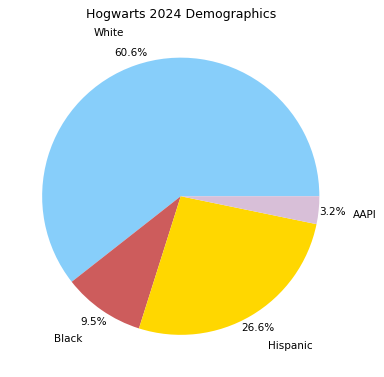


~~~



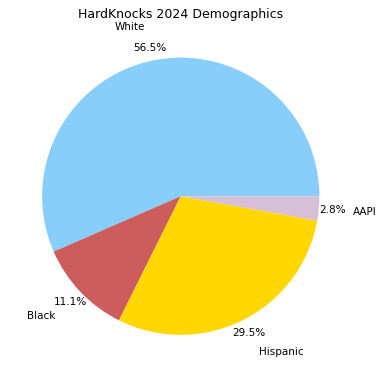


~~~



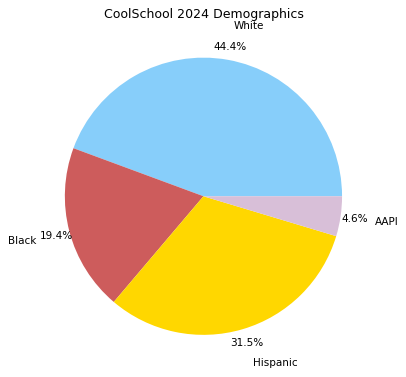


~~~



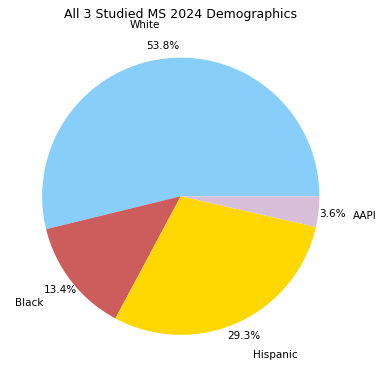


~~~



<Figure size 750x450 with 0 Axes>

In [59]:
# School demo pie charts: 
school_colors = ['lightskyblue','indianred','gold','thistle']
plt.title("Hogwarts 2024 Demographics")
plt.pie(hogwarts_slice, labels = school_labels, colors=school_colors, autopct='%1.1f%%', pctdistance = 1.1, labeldistance = 1.25)
plt.show()
plt.clf()
print("\n~~~\n")
plt.title("HardKnocks 2024 Demographics")
plt.pie(knocks_slice, labels = school_labels, colors=school_colors, autopct='%1.1f%%', pctdistance = 1.1, labeldistance = 1.25)
plt.show()
plt.clf()
print("\n~~~\n")
plt.title("CoolSchool 2024 Demographics")
plt.pie(cool_slice, labels = school_labels, colors=school_colors, autopct='%1.1f%%', pctdistance = 1.1, labeldistance = 1.25)
plt.show()
plt.clf()
print("\n~~~\n")
plt.title("All 3 Studied MS 2024 Demographics")
plt.pie(all_slice, labels = school_labels, colors=school_colors, autopct='%1.1f%%', pctdistance = 1.1, labeldistance = 1.25)
plt.show()
plt.clf()
print("\n~~~\n")